In [704]:
# Import necessary libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy

# Load the dataset.
ndf = pd.read_csv('Netflix Dataset.csv')

# Display the first few rows of the dataframe to ensure it is loaded correctly
display(ndf.head())

,Show_Id,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,07:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",PG-13,123 min,Dramas,A brilliant group of students become card-coun...


In [705]:
ndf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7789 entries, 0 to 7788
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Show_Id       7789 non-null   object
 1   Category      7789 non-null   object
 2   Title         7789 non-null   object
 3   Director      5401 non-null   object
 4   Cast          7071 non-null   object
 5   Country       7282 non-null   object
 6   Release_Date  7779 non-null   object
 7   Rating        7782 non-null   object
 8   Duration      7789 non-null   object
 9   Type          7789 non-null   object
 10  Description   7789 non-null   object
dtypes: object(11)
memory usage: 669.5+ KB


In [706]:
ndf.describe()

,Show_Id,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description
count,7789,7789,7789,5401,7071,7282,7779,7782,7789,7789,7789
unique,7787,2,7787,4050,6831,681,1565,14,216,492,7769
top,s6621,Movie,The Lost Okoroshi,"Raúl Campos, Jan Suter",David Attenborough,United States,"January 1, 2020",TV-MA,1 Season,Documentaries,Multiple women report their husbands as missin...
freq,2,5379,2,18,18,2556,118,2865,1608,334,3


In [707]:
ndf.isna().sum()

Show_Id            0
Category           0
Title              0
Director        2388
Cast             718
Country          507
Release_Date      10
Rating             7
Duration           0
Type               0
Description        0
dtype: int64

In [708]:
# Clean/format  data as needed

# Helper
def arraystrip(l):
    r = []
    if isinstance(l, list):
        for x in l:
            r.append(x.strip())
    return r

ndf = ndf.drop_duplicates()
ndf['Type'] = ndf['Type'].str.split(",")
ndf['Type'] = ndf['Type'].map(arraystrip)
ndf['Country'] = ndf['Country'].str.split(",")
ndf['Country'] = ndf['Country'].map(arraystrip)

ndf['Duration'] = ndf['Duration'].map(lambda x: int(x.replace('min', '').replace('Seasons', '').replace('Season', '').strip()))

ndf.head()

,Show_Id,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",[Brazil],"August 14, 2020",TV-MA,4,"[International TV Shows, TV Dramas, TV Sci-Fi ...",In a future where the elite inhabit an island ...
1,s2,Movie,07:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",[Mexico],"December 23, 2016",TV-MA,93,"[Dramas, International Movies]",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",[Singapore],"December 20, 2018",R,78,"[Horror Movies, International Movies]","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",[United States],"November 16, 2017",PG-13,80,"[Action & Adventure, Independent Movies, Sci-F...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",[United States],"January 1, 2020",PG-13,123,[Dramas],A brilliant group of students become card-coun...


In [709]:
# Q1
categ = ndf['Category'].value_counts().sort_index()
categ

Category
Movie      5377
TV Show    2410
Name: count, dtype: int64

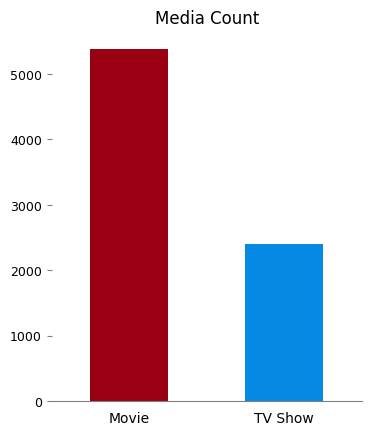

In [710]:
fig, ax = plt.subplots()

colors = ['#990012', '#0689e4']
categ.plot(kind='bar', color=colors)
fig.set_figwidth(4)
ax.spines[['top', 'left', 'right']].set_visible(False)
ax.spines['bottom'].set_color('Gray')
ax.tick_params('x', rotation=0, bottom=False)
ax.tick_params('y', color='Gray', labelsize=9)
ax.set_xlabel('')
ax.set_title('Media Count')
plt.savefig('images/q1')
plt.show()

Sports                    0.025170
Animation                 0.026326
Sci-Fi & Fantasy          0.037755
Music & Performance       0.041223
Horror                    0.048928
Romance                   0.110954
Action & Adventure        0.111853
Children & Family         0.129190
Thriller/Mystery/Crime    0.135867
Documentary/Reality       0.185694
Comedy                    0.305252
Drama                     0.360858
dtype: float64


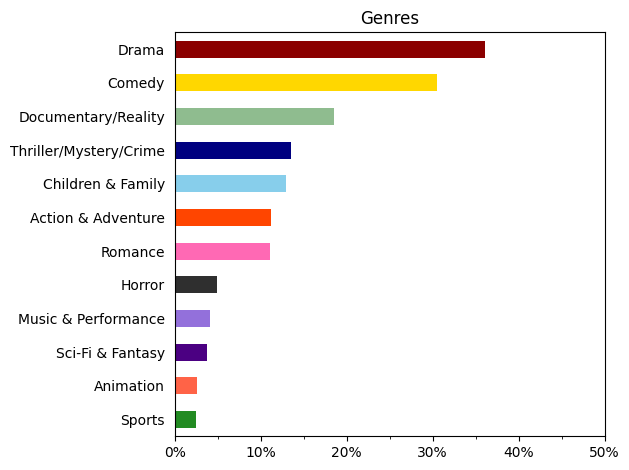

In [711]:
# Q2
# Dictionary of types. Needs to be further simplified to genres.
d = {}

def acount(l):
    global d
    for i in l:
        if i in d:
            d[i] += 1
        else:
            d[i] = 1

ndf['Type'].map(acount)

# Done manually. Flawed.
genre = {
    'Drama': d['TV Dramas'] + d['Dramas'],
    'Comedy': d['TV Comedies'] + d['Comedies'] + d['Stand-Up Comedy'] + d['Stand-Up Comedy & Talk Shows'],
    'Action & Adventure': d['TV Action & Adventure'] + d['Action & Adventure'],
    'Sci-Fi & Fantasy': d['TV Sci-Fi & Fantasy'] + d['Sci-Fi & Fantasy'],
    'Horror': d['TV Horror'] + d['Horror Movies'],
    'Thriller/Mystery/Crime': d['Thrillers'] + d['TV Mysteries'] + d['Crime TV Shows'] + d['TV Thrillers'],
    'Romance': d['Romantic Movies'] + d['Romantic TV Shows'],
    'Documentary/Reality': d['Documentaries'] + d['Docuseries'] + d['Reality TV'] + d['Science & Nature TV'],
    'Animation': d['Anime Series'] + d['Anime Features'],
    'Music & Performance': d['Music & Musicals'],
    'Sports': d['Sports Movies'],
    'Children & Family': d['Children & Family Movies'] + d["Kids' TV"] + d['Teen TV Shows']
}

# Percentage, there is overlap in what genres a piece of media is labeled as.
total = len(ndf)
for x in genre:
    genre[x] = genre[x]/total

from matplotlib.ticker import (MultipleLocator, PercentFormatter)

genre = pd.Series(genre).sort_values()
print(genre)
fig, ax = plt.subplots()

colors = ['#228B22', '#FF6347', '#4B0082', '#9370DB', '#2F2F2F', '#FF69B4', '#FF4500', '#87CEEB', '#000080', '#8FBC8F', '#FFD700', '#8B0000']
genre.plot(kind='barh', color=colors)
ax.tick_params('y', left=False)
ax.set_title('Genres')
ax.set_xlim([0,0.5])
ax.xaxis.set_major_formatter(PercentFormatter(xmax=1))
ax.xaxis.set_minor_locator(MultipleLocator(0.05))
plt.tight_layout()
plt.savefig('images/q2')
plt.show()

The average length of a movie is roughly 99 minutes with the shortest being 3 minutes and the longest being 312 minutes.


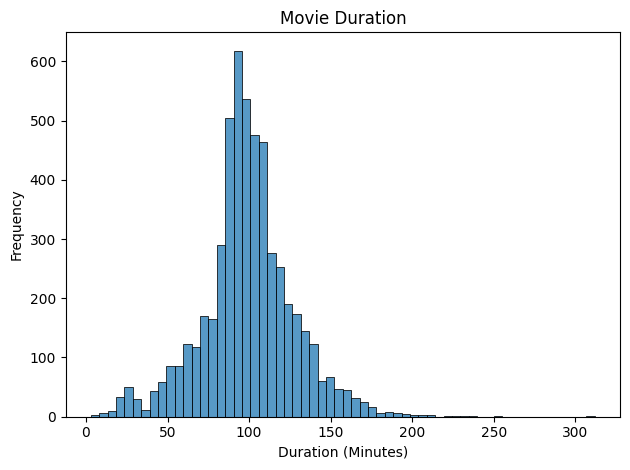

In [712]:
movtime = ndf[ndf['Category'] == 'Movie']['Duration']
print(f"The average length of a movie is roughly {int(movtime.mean())} minutes with the shortest being {movtime.min()} minutes and the longest being {movtime.max()} minutes.")

fig, ax = plt.subplots()
sns.histplot(x=movtime, bins=60)
ax.set_title('Movie Duration')
ax.set_ylabel('Frequency')
ax.set_xlabel("Duration (Minutes)")
plt.tight_layout()
plt.savefig('images/q3')
plt.show()

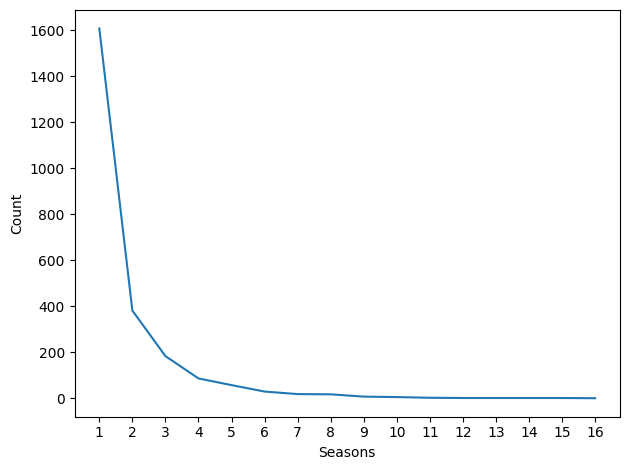

In [713]:
seatime = ndf[ndf['Category'] == 'TV Show']['Duration']
longest = seatime.max()
s = seatime.value_counts()

fig, ax = plt.subplots()
sns.lineplot(s)

ax.set_ylabel('Count')
ax.set_xlabel('Seasons')
ax.xaxis.set_ticks(range(1, longest + 1))
plt.tight_layout()
plt.savefig('images/q4')
plt.show()

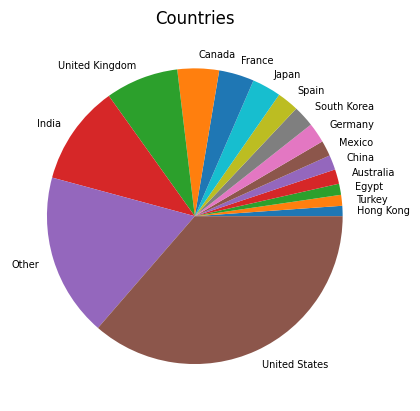

In [714]:
c = {}

def ccount(l):
    global c
    for i in l:
        if i in c:
            c[i] += 1
        else:
            c[i] = 1

ndf['Country'].map(ccount)

# Groups countries that take up a smaller portion of the total
g = {'Other': 0}
for x in c:
    if c[x] < 100:
        g['Other'] += c[x]
    else:
        g[x] = c[x]

g = pd.Series(g).sort_values()
fig, ax = plt.subplots()

g.plot(kind='pie', fontsize=7)

ax.set_title('Countries')
plt.savefig('images/q5')
plt.show()

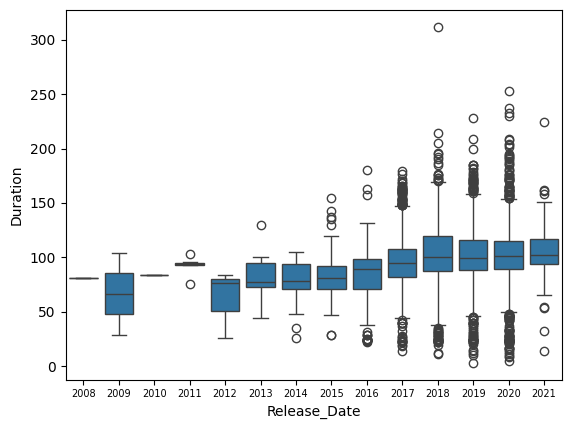

In [715]:
t = ndf[ndf['Category'] == 'Movie'][['Release_Date', 'Duration']]
t['Release_Date'] = t['Release_Date'].map(lambda x: int(x.split(',')[1].strip()))

fig, ax = plt.subplots()
sns.boxplot(data=t, x='Release_Date', y='Duration')
ax.tick_params('x', labelsize=7)
plt.savefig('images/q6')
plt.show()

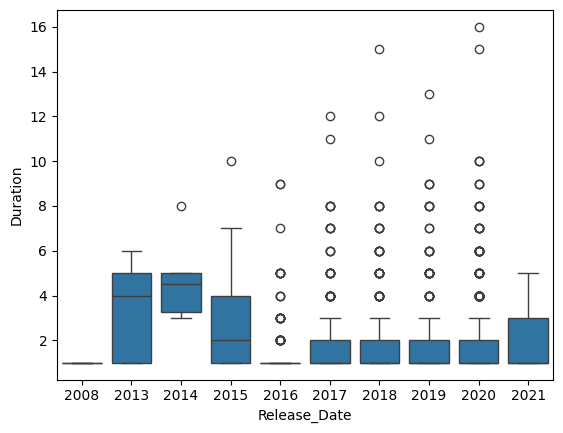

In [716]:
tv = ndf[ndf['Category'] == 'TV Show'][['Release_Date', 'Duration']]
tv = tv.dropna()
tv['Release_Date'] = tv['Release_Date'].map(lambda x: int(x.split(',')[1].strip()))

fig, ax = plt.subplots()
sns.boxplot(data=tv, x='Release_Date', y='Duration')
plt.savefig('images/q7')
plt.show()